<a href="https://moodle.mimuw.edu.pl/pluginfile.php/270319/mod_resource/content/6/SML_2023_project_1.pdf">Treść zadania</a>

Task configuration

In [196]:
"""Main libraries"""
from IPython.display import display
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.subplots as ps
import plotly.graph_objects as go
from scipy.stats import norm, kendalltau, chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import ttest_ind, ttest_1samp, pearsonr, ks_2samp, kstest, normaltest

"""For preety prints"""
import json
from pprint import pprint
from pygments import highlight, lexers, formatters

**Task 1**

Code to load data and get basic information:

In [165]:
df = pd.read_csv('earnings.csv', sep=';')
print(f"There are {df.shape[0]} observations in the sample.")
print(f"Dataset contains following columns: {df.columns.values.tolist()}")
print(f"Total number of null values is {np.sum(df.isnull().sum().values)}.")
df

There are 11000 observations in the sample.
Dataset contains following columns: ['id', 'base', 'bonus', 'overtime_pay', 'other', 'sector', 'section_07', 'sex', 'education', 'contract', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
Total number of null values is 0.


id       base    bonus  overtime_pay    other  sector  section_07  \
0      192064   26651.53     0.00          0.00     0.00       1           3   
1       25495   40168.50  1500.00          0.00  3414.32       1           2   
2      142164   20134.80     0.00          0.00  1700.41       1           2   
3      198034   16475.00     0.00          0.00  1305.00       1           2   
4      144990   34797.60     0.00       1893.35  3118.73       1           2   
...       ...        ...      ...           ...      ...     ...         ...   
10995   41597   36573.22  1323.65       1276.80  3337.32       1           2   
10996  120022   28280.00  5470.00          0.00  2385.13       1           1   
10997   41800  109316.96     0.00          0.00  9042.58       1           1   
10998  153849   57721.35  6950.00          0.00  4906.32       1           1   
10999     724   37676.52   700.00        730.31  3296.65       1           2   

       sex  education  contract  age  duration_total  duration_entity  \
0        2          4         1   49           33.03             7.06   
1        1          1         1   36           10.07             6.01   
2        2          4         1   52           28.08            19.05   
3        2          5         1   55           35.07            11.01   
4        2          2         1   50           27.00            19.01   
...    ...        ...       ...  ...             ...              ...   
10995    2          2         1   50           27.02            27.02   
10996    2          4         1   41           18.08            15.09   
10997    2          2         1   47           20.02             1.07   
10998    2          2         1   47           28.01            21.10   
10999    2          2         1   51           31.01            17.02   

       duration_nominal  duration_overtime  
0               1524.15                0.0  
1               1562.40                0.0  
2               1816.00                0.0  
3               1816.00                0.0  
4                722.80               63.0  
...                 ...                ...  
10995            766.80               40.0  
10996           1792.00                0.0  
10997           1656.00                0.0  
10998           1784.00                0.0  
10999            666.00               23.0  

[11000 rows x 15 columns]

- There are 11000 observations in the sample.
- Dataset contains following quantitative columns:
  - base
  - bonus
  - overtime_pay
  - other
  - age
  - duration_total
  - duration_entity
  - duration_nominal
  - duration_overtime
- Dataset contains following qualitative columns:
  - sector
  - section_07
  - sex
  - education
  - contract
- Dataset also contains column id but it is just unique index.
- Data set does not contain missing data (null values).

In [166]:
# Descriptive statistics for quantitative columns
quantitative_columns = ['base', 'bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
quantitative_data = df[quantitative_columns]
quantitative_data.describe()

base          bonus   overtime_pay         other  \
count   11000.000000   11000.000000   11000.000000  11000.000000   
mean    33376.738065    2128.486176    1679.273923   2477.625815   
std     19276.551638    4966.444726    5407.964344   3715.419120   
min        10.000000       0.000000       0.000000      0.000000   
25%     20995.115000       0.000000       0.000000      0.000000   
50%     31341.245000     620.000000       0.000000   2141.820000   
75%     41348.290000    2940.717500    1139.330000   3497.430000   
max    241624.390000  258061.000000  228110.340000  88555.760000   

                age  duration_total  duration_entity  duration_nominal  \
count  11000.000000     11000.00000     11000.000000      11000.000000   
mean      42.470182        18.56708        11.401382       1301.307435   
std       10.012140        10.99695         9.322181        540.189234   
min       19.000000         0.01000         0.010000         12.800000   
25%       34.000000         9.03000         3.070000        766.800000   
50%       43.000000        19.03500         9.100000       1591.900000   
75%       51.000000        27.11000        18.040000       1768.000000   
max       77.000000        57.02000        46.010000       2024.000000   

       duration_overtime  
count       11000.000000  
mean           47.702325  
std           111.963867  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%            40.000000  
max          1812.580000

In [167]:
indices = {
    'sector': {
        1: 'public', 
        2: 'private'
    },
    'section_07': {
        1: 'Public Administration and Defence; Compulsory Social Security',
        2: 'Education',
        3: 'Human Health and Social Work Activities)'
    },
    'sex': {
        1: 'man',
        2: 'woman'
    },
    'education': {
        1: 'doctorate', 
        2: 'higher',
        3: 'post-secondary', 
        4: 'secondary', 
        5: 'basic vocational',
        6: 'middle school and below'
    },
    'contract': {
        1: 'for an indefinite period', 
        2: 'for a definite period'
    }
}

frequency_tables = {
    column: df[column].value_counts().rename(index=idx).to_dict() for column, idx in indices.items()
}

def preety_print(dict):
    print(highlight(json.dumps(frequency_tables, indent=4), lexers.JsonLexer(), formatters.Terminal256Formatter(style="github-dark")))

preety_print(frequency_tables)

{
    "sector": {
        "public": 10548,
        "private": 452
    },
    "section_07": {
        "Education": 5867,
        "Human Health and Social Work Activities)": 2732,
        "Public Administration and Defence; Compulsory Social Security": 2401
    },
    "sex": {
        "woman": 8289,
        "man": 2711
    },
    "education": {
        "higher": 6633,
        "secondary": 1983,
        "basic vocational": 906,
        "post-secondary": 680,
        "doctorate": 430,
        "middle school and below": 368
    },
    "contract": {
        "for an indefinite period": 9306,
        "for a definite period": 1694
    }
}



**Histograms**

array([[<Axes: title={'center': 'base'}>,
        <Axes: title={'center': 'bonus'}>,
        <Axes: title={'center': 'overtime_pay'}>],
       [<Axes: title={'center': 'other'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration_total'}>],
       [<Axes: title={'center': 'duration_entity'}>,
        <Axes: title={'center': 'duration_nominal'}>,
        <Axes: title={'center': 'duration_overtime'}>]], dtype=object)

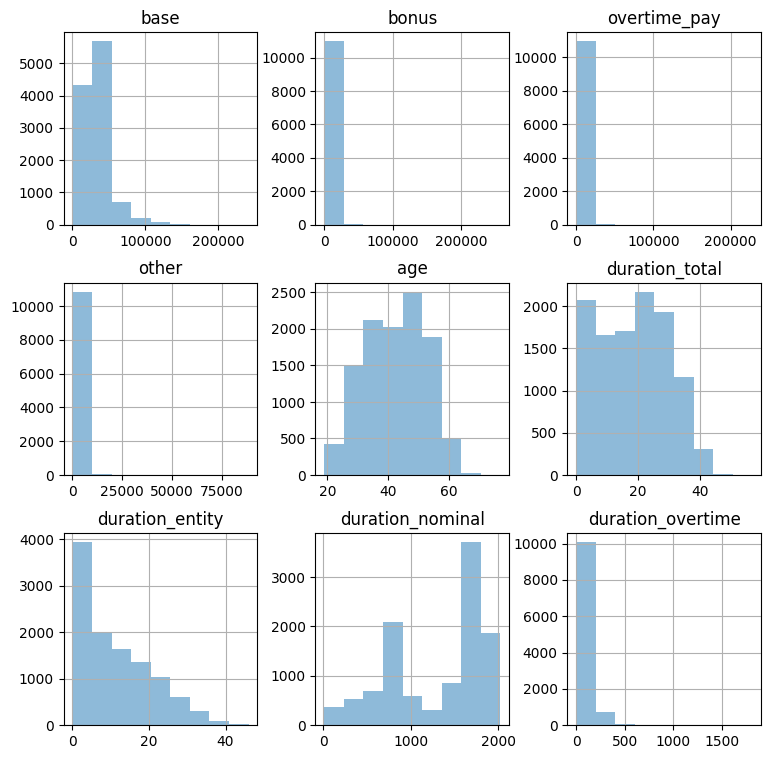

In [168]:
quantitative_bins = quantitative_data.shape[1]
quaititative_height = quantitative_bins
# General distribution histograms
quantitative_data.hist(bins=quantitative_bins, alpha=0.5, figsize=(quantitative_bins, quaititative_height))

Now I will analyze if the distribution of variable is close to normal or log-normal distribution plotting the data or the logarithm or data without extreme values that makes plots less informative.

**Base Column Analysis**

In [169]:
columns_config = {
    'base': {
        'scale': 800,
        'lower_range': 8,
        'log': True,
    }, 
    'bonus': {
        'scale': 800,
        'lower_range': 0,
        'log': True,
    }, 
    'overtime_pay': {
        'scale': 800,
        'lower_range': 0,
        'log': True,
    }, 
    'other': {
        'scale': 600,
        'lower_range': 5,
        'log': True,
    }, 
    'age': {
        'scale': 10000,
        'lower_range': 0,
        'log': False,
    }, 
    'duration_total': {
        'scale': 2000,
        'lower_range': 0,
        'log': True,
    }, 
    'duration_entity': {
        'scale': 2000,
        'lower_range': 0,
        'log': True,
    }, 
    'duration_nominal': {
        'scale': 2000,
        'lower_range': 0,
        'log': True,
    }, 
    'duration_overtime': {
        'scale': 500,
        'lower_range': 0,
        'log': True,
    },
}

def make_qplot(column_name, config):
    column_data = quantitative_data[column_name]
    if config['log']:
        column_data = column_data[column_data > 0]
        column_data = np.log(column_data)
    column_data = column_data[column_data > config["lower_range"]]
    histogram = px.histogram(column_data, title=f'{column} {"(log)" if config["log"] else "(original)"}')
    mu, std = np.mean(column_data), np.std(column_data)
    y = config["scale"] * norm.pdf(np.linspace(mu-3*std, mu+3*std), loc=mu, scale=std)
    histogram.add_trace(
        go.Scatter(x=np.linspace(mu-3*std, mu+3*std), y=y)
    )
    histogram.update_layout(height=400, width=400, showlegend=False)
    histogram.show()

for column, config in columns_config.items():
    make_qplot(column, config)

<h2>TODO (task 1): Write some concusions about it and maybe config it better</h2>

**Task 2**

I computed and visualized Kendall correlation coefficients for quantitative data becouse it doesn't require specyfic distributions and is immune to outliers. It seems that all relationships between this data are significant becouse the p-values are really low.

In [170]:

n = len(quantitative_columns)
correlation_coefficients = np.ones((n, n))
max_p_value = 0

for i in range(n):
    for j in range(i + 1, n):
        correlation_coefficient, p_value = kendalltau(df[quantitative_columns[i]], df[quantitative_columns[j]])
        correlation_coefficients[i, j] = correlation_coefficient
        correlation_coefficients[j, i] = correlation_coefficient
        if p_value > max_p_value:
            max_p_value = p_value

correlation_matrix = pd.DataFrame(index=quantitative_columns, columns=quantitative_columns, data=correlation_coefficients)
fig = px.imshow(correlation_matrix, x=quantitative_columns, y=quantitative_columns, color_continuous_scale='Jet', zmin=-1, zmax=1)
fig.update_layout(title='Kendall tau Correlation Coefficients Heatmap', width=600, height=500)
fig.show()

print(f"The maximal p_value is {max_p_value} < 0.01 so all the correlations are significant")
        

The maximal p_value is 3.0329373845227792e-05 < 0.01 so all the correlations are significant


In [171]:
qualitative_columns = list(indices.keys())
n = len(qualitative_columns)
for i in range(n):
    for j in range(i + 1, n):
        print("_" * 64)
        print(f"Analysis of associations between {qualitative_columns[i]} and {qualitative_columns[j]}:")
        print("Contigency table:")
        contingency_table = pd.crosstab(df[qualitative_columns[i]], df[qualitative_columns[j]])
        display(contingency_table)
        chi2, p_value, degrees, _ = chi2_contingency(contingency_table)
        P = np.sqrt(chi2 / (chi2 + df.shape[0]))
        print(f"chi2: {chi2}, p_value: {p_value}, degrees of freedom: {degrees}, pearson_coeff: {P}")
        print(f"The dependency is {'' if p_value < 0.01 else 'not '}significant.")
        print(f"The Pearson coefficient is {P} so the relationship {'is very week' if P < 0.02 else 'is not very strong'}.")

________________________________________________________________
Analysis of associations between sector and section_07:
Contigency table:


section_07     1     2     3
sector                      
1           2395  5701  2452
2              6   166   280

chi2: 376.51486558141704, p_value: 1.741148294279235e-82, degrees of freedom: 2, pearson_coeff: 0.18192251215862765
The dependency is significant.
The Pearson coefficient is 0.18192251215862765 so the relationship is not very strong.
________________________________________________________________
Analysis of associations between sector and sex:
Contigency table:


sex        1     2
sector            
1       2618  7930
2         93   359

chi2: 3.979425499771631, p_value: 0.046059270149792046, degrees of freedom: 1, pearson_coeff: 0.019016706529988187
The dependency is not significant.
The Pearson coefficient is 0.019016706529988187 so the relationship is very week.
________________________________________________________________
Analysis of associations between sector and education:
Contigency table:


education    1     2    3     4    5    6
sector                                   
1          386  6435  634  1866  872  355
2           44   198   46   117   34   13

chi2: 91.10605566465615, p_value: 3.934881885969482e-18, degrees of freedom: 5, pearson_coeff: 0.09063296612960224
The dependency is significant.
The Pearson coefficient is 0.09063296612960224 so the relationship is not very strong.
________________________________________________________________
Analysis of associations between sector and contract:
Contigency table:


contract     1     2
sector              
1         8994  1554
2          312   140

chi2: 86.50634876512693, p_value: 1.3928943180816976e-20, degrees of freedom: 1, pearson_coeff: 0.08833374351678683
The dependency is significant.
The Pearson coefficient is 0.08833374351678683 so the relationship is not very strong.
________________________________________________________________
Analysis of associations between section_07 and sex:
Contigency table:


sex            1     2
section_07            
1            735  1666
2           1490  4377
3            486  2246

chi2: 116.96277760046287, p_value: 3.9981174691047954e-26, degrees of freedom: 2, pearson_coeff: 0.10257245752214636
The dependency is significant.
The Pearson coefficient is 0.10257245752214636 so the relationship is not very strong.
________________________________________________________________
Analysis of associations between section_07 and education:
Contigency table:


education     1     2    3    4    5    6
section_07                               
1             9  1583  114  559   95   41
2           360  4065  112  597  535  198
3            61   985  454  827  276  129

chi2: 1760.7187359754234, p_value: 0.0, degrees of freedom: 10, pearson_coeff: 0.37145604011759387
The dependency is significant.
The Pearson coefficient is 0.37145604011759387 so the relationship is not very strong.
________________________________________________________________
Analysis of associations between section_07 and contract:
Contigency table:


contract       1     2
section_07            
1           2204   197
2           4849  1018
3           2253   479

chi2: 122.09157307819385, p_value: 3.0771719334165714e-27, degrees of freedom: 2, pearson_coeff: 0.10477305598582977
The dependency is significant.
The Pearson coefficient is 0.10477305598582977 so the relationship is not very strong.
________________________________________________________________
Analysis of associations between sex and education:
Contigency table:


education    1     2    3     4    5    6
sex                                      
1          252  1628   79   359  307   86
2          178  5005  601  1624  599  282

chi2: 416.86093935921195, p_value: 6.882155246979766e-88, degrees of freedom: 5, pearson_coeff: 0.19108308566926627
The dependency is significant.
The Pearson coefficient is 0.19108308566926627 so the relationship is not very strong.
________________________________________________________________
Analysis of associations between sex and contract:
Contigency table:


contract     1     2
sex                 
1         2213   498
2         7093  1196

chi2: 24.04999884093461, p_value: 9.386631884816147e-07, degrees of freedom: 1, pearson_coeff: 0.04670753444496185
The dependency is significant.
The Pearson coefficient is 0.04670753444496185 so the relationship is not very strong.
________________________________________________________________
Analysis of associations between education and contract:
Contigency table:


contract      1     2
education            
1           291   139
2          5519  1114
3           602    78
4          1771   212
5           796   110
6           327    41

chi2: 158.77494930779181, p_value: 1.8056322519626752e-32, degrees of freedom: 5, pearson_coeff: 0.11928414774348876
The dependency is significant.
The Pearson coefficient is 0.11928414774348876 so the relationship is not very strong.


**Task 3**

Scatter plots for the variables related to the salary structure against the duration of employment in the reporting entity.

Some of the variables has extremely big single values (outliers) so I provided additional plots without them.

In [172]:
salary_variables = ['base', 'bonus', 'overtime_pay', 'other']

for variable in salary_variables:
    fig = px.scatter(df, x='duration_entity', y=variable, title=variable)
    fig.show()

data = df[['bonus', 'duration_entity']].copy()
data['bonus'] = data['bonus'][data['bonus'] < 200000]
fig = px.scatter(data, x='duration_entity', y='bonus', title=f'bonus scatterplot without outlier')
fig.show()

data = df[['overtime_pay', 'duration_entity']].copy()
data['overtime_pay'] = data['overtime_pay'][data['overtime_pay'] < 100000]
fig = px.scatter(data, x='duration_entity', y='overtime_pay', title=f'overtime pay scatterplot without 3 outliers')
fig.show()

Boxplots for base variable (all values and values less or equal to some threshold)

This box plots has a lot of single big values (especially bonus one) so we can also draw boxplots for bounded data to see what the boxplot presents better.

In [173]:
tickvals = list(indices['contract'].keys())
ticktext = list(indices['contract'].values())

def box_plot(variable, title, bound = lambda data: data):
    fig = go.Figure()
    fig.add_trace(go.Box(y=bound(df[df['contract'] == tickvals[0]][variable]), name=ticktext[0], marker_color="#ff4422"))
    fig.add_trace(go.Box(y=bound(df[df['contract'] == tickvals[1]][variable]), name=ticktext[1], marker_color="#22ff44"))
    fig.update_layout(title=title)
    fig.show()
    
box_plot('base', "Box plot for base values")
# Additional plots below
box_plot('base', "Box plot for base bounded by 70k", lambda data: data[data < 70000])
box_plot('bonus', "Box plot for bonus")
box_plot('bonus', "Box plot for bonus bounded by 200k (outlier removed)", lambda data: data[data < 200000])
box_plot('bonus', "Box plot for bonus bounded by 10k (more representative)", lambda data: data[data < 10000])

A heatmap of the (appropriate!) correlation coefficients among the quantitative variables in the dataset

In [174]:
px.imshow(quantitative_data.corr(method="kendall"), color_continuous_scale='Jet', zmin=-1)

Additional plots for qualitative data. Violin for education column becouse its qualitative value with more than 3 possible values so it is very descriptive.

In [175]:
fig = px.violin(df['education'], y='education')
tickvals = list(indices['education'].keys())
ticktext = list(indices['education'].values())
fig.update_yaxes(tickvals=tickvals, ticktext=ticktext)
fig.show()

Histograms for other qualitative values

In [176]:
def add_subplot(fig, column, x, y):
    tickvals = list(indices[column].keys())
    ticktext = list(indices[column].values())
    fig.add_trace(go.Histogram(x=df[column], name=column), x, y)
    fig.update_xaxes(tickvals=tickvals, ticktext=ticktext, row=x, col=y)

fig = ps.make_subplots(rows=2, cols=2)
add_subplot(fig, "contract", 1, 1)
add_subplot(fig, "sex", 1, 2)
add_subplot(fig, "sector", 2, 1)
add_subplot(fig, "section_07", 2, 2)
fig.update_layout(width=800, height=800)
fig.show()

This are some histograms showing count of people with total of base salaries by the sex. There are a lot more woman in the dataframe than man but there are not so much woman with high salaries (arbitrary thresholds below).

In [177]:
fig = go.Figure()
for k, label in indices['sex'].items():
    fig.add_trace(go.Histogram(x=df[(df['sex'] == k) & (df['base'] >= 1e5)]['base'], name=label, nbinsx=10))
fig.update_layout(title="People with high base salary depending on sex")
fig.show()

fig = go.Figure()
for k, label in indices['sex'].items():
    fig.add_trace(go.Histogram(x=df[(df['sex'] == k) & (df['base'] >= 6e4) & (df['base'] < 1e5)]['base'], name=label, nbinsx=10))
fig.update_layout(title="People with average base salary depending on sex")
fig.show()

fig = go.Figure()
for k, label in indices['sex'].items():
    fig.add_trace(go.Histogram(x=df[(df['sex'] == k) & (df['base'] < 6e4)]['base'], name=label, nbinsx=10))
fig.update_layout(title="People with low base salary depending on sex")
fig.show()

**Task 4**

<a href="https://www.statology.org/confidence-interval-for-median/">Confidence interval for median source</a>
I made assumptions that distribution is normally distributed and we do not know the true variance and mean. This assumptions seems justifiable as this data is from database with a lot of data and usually such data of random person age is distributed normally.


In [178]:
from scipy.stats import t, chi2

alpha = 0.01
assert 1 - alpha == 0.99
age = df['age']

dof = len(age) - 1
mu_hat = age.mean()
std_hat = age.std(ddof=1)
var_hat = age.var(ddof=1)

margin = t.ppf(1 - alpha / 2, dof) * std_hat / np.sqrt(dof)
mean_interval = mu_hat - margin, mu_hat + margin
lower_var = dof * var_hat / chi2.ppf(1 - alpha / 2, dof)
upper_var= dof * var_hat / chi2.ppf(alpha / 2, dof)
var_interval = lower_var, upper_var

print(f"Confidence interval for mean: {mean_interval}")
print(f"Confidence interval for variance: {var_interval}")

print(f"Sample median: {age.median()}")
z_score = norm.ppf(1 - alpha / 2)
round_float = lambda x: int(np.floor(x + 0.5))
n = len(age)
j = n * 0.5 - 0.5 * z_score * np.sqrt(n)
k = n * 0.5 + 0.5 * z_score * np.sqrt(n)
j, k = round_float(j), round_float(k)
age_sorted = age.agg('sort')
median_interval = age_sorted[j], age_sorted[k]
print(f"Confidence interval for median {median_interval}")

Confidence interval for mean: (42.224234114538405, 42.71612952182524)
Confidence interval for variance: (96.84602609043314, 103.81334720276196)
Sample median: 43.0
Confidence interval for median (43, 43)


**Task 5**

In [179]:
# Assumptions to all tests
# I assume normality for both variables and linear relationship between them.
# I assume independence of observations.

alpha = 0.01

get_key = lambda k, d: list(filter(lambda x: d[x] == k, d))[0]

# Null Hypothesis (H0): There are no significant differences between the base salary of the employees of the public and private sector.
# Alternative Hypothesis (H1): There are significant differences between the base salary of the employees of the public and private sector.
# I used Welsh t-test becouse I am not certain if the variances are equal.
public_id, private_id = get_key('public', indices['sector']), get_key('private', indices['sector']), 
public_base = df[df['sector'] == public_id]['base'].values
private_base = df[df['sector'] == private_id]['base'].values

p_value = ttest_ind(public_base, private_base, equal_var=False)[1]
if p_value < alpha:
    print("There are significant differences between the base salary of the employees of the public and private sector. (rejected null hypothesis)")
else:
    print("Failed to reject the hypothesis that are no significant differences between the base salary of the employees of the public and private sector.")

# Null Hypothesis (H0): Among employees that are younger than 30 years old, the mean total duration of the
# employment is equal to the mean total duration of the employment in the reporting entity.
# Alternative Hypothesis (H1): Among employees that are younger than 30 years old, the mean total duration of the
# employment is not equal to the mean total duration of the employment in the reporting entity.
# The one-sample t-test is a standard statistical method widely used for comparing sample and population mean. 
young = df[df['age'] < 30] 
young_total = young['duration_total']
young_entity = young['duration_entity']
reporting_entity_duration_mean = young_entity.mean()

p_value = ttest_1samp(young_total, reporting_entity_duration_mean)[1]
if p_value < alpha:
    print("Among employees that are younger than 30 years old, the mean total duration of the employment is not equal... (rejected null hypothesis)")
else:
    print("Failed to reject the null hypothesis.")

# Null Hypothesis (H0): A shorter total duration of the employment is not correlated with the longer time actually worked overtime.
# Alternative Hypothesis (H1): A shorter total duration of the employment is correlated with the longer time actually worked overtime.
# Pearson's correlation coefficient test measures the linear relationship between two continuous variables so it is suitable here.
total_duration = df['duration_total']
overtime_duration = df['duration_overtime']
correlation_coefficient, p_value = pearsonr(total_duration, overtime_duration)

alpha = 0.01

if p_value < alpha and correlation_coefficient < 0:
    print("A shorter total duration of the employment is correlated with the longer time actually worked overtime (rejected null hypothesis).")
else:
    print("Failed to reject the null hypothesis. Shorter total duration of the employment may not be correlated with the longer time actually worked overtime.")



There are significant differences between the base salary of the employees of the public and private sector. (rejected null hypothesis)
Among employees that are younger than 30 years old, the mean total duration of the employment is not equal... (rejected null hypothesis)
Failed to reject the null hypothesis. Shorter total duration of the employment may not be correlated with the longer time actually worked overtime.


**Task 6**

In [180]:
# Null Hypothesis (H0): Sector and coded variables are independent.
# Alternative Hypothesis (H1): Sector and coded variables are dependent.
q = df['duration_total'].quantile(np.arange(1., 4) / 4)
def encode(duration_total):
    if duration_total <= q[1/4]:
        return 'low'
    elif q[1 / 4] < duration_total <= q[3 / 4]:
        return 'medium'
    else:
        return 'high'

coded_variable = df['duration_total'].apply(encode)
crosstab = pd.crosstab(df['sector'], coded_variable)
p_value = chi2_contingency(crosstab)[1]

alpha = 0.01

if p_value < alpha:
    print("Sector and coded variables are dependent (rejected null hypothesis)")
else:
    print("Failed to reject the null hypothesis.")

admin_id = get_key('Public Administration and Defence; Compulsory Social Security', indices['section_07'])
admin_section = df[df['section_07'] == admin_id]
other_sections = df[df['section_07'] != admin_id]

# Kolmogorov-Smirnov test
for component in salary_variables:
    p_value = ks_2samp(admin_section[component], other_sections[component])[1]
    
    if p < alpha:
        print(f"{component}: Distributions are different (rejected null hypothesis)")
    else:
        print(f"{component}: Failed to reject null hypothesis.")

# Kolmogorov-Smirnov test as goodness of fit
lam = 10
p_value = kstest(df['duration_total'], 'expon', args=(0, 1/lam))[1]

if p_value < alpha:
    print("duration_total doesn't follow the Exp(10) distribution (rejected null hypothesis)")
else:
    print("Failed to reject null hypothesis..")

Sector and coded variables are dependent (rejected null hypothesis)
base: Distributions are different (rejected null hypothesis)
bonus: Distributions are different (rejected null hypothesis)
overtime_pay: Distributions are different (rejected null hypothesis)
other: Distributions are different (rejected null hypothesis)
duration_total doesn't follow the Exp(10) distribution (rejected null hypothesis)


**Task 7**

$R^2$ is 1 becouse the modeled values exactly match the observed values

Individual significance

| variable          | pvalue   |
|-------------------|----------|
| age               | 0.016172 |
| base              | 0.000000 |
| bonus             | 0.000000 |
| contract          | 0.621153 |
| duration_entity   | 0.002591 |
| duration_nominal  | 0.000001 |
| duration_overtime | 0.000002 |
| duration_total    | 0.521832 |
| education         | 0.091459 |
| other             | 0.000000 |
| overtime_pay      | 0.000000 |
| section_07        | 0.747180 |
| sector            | 0.337949 |
| sex               | 0.961644 |

This means base, bonus, other, overtime_pay are the most significant (becouse total depends on them).
Aksi duration_nominal and duration_overtime are very significant. Duration entity, age and education are also significant
Other variables are not very significant. Sex is highly not significant.

Joint significance is 0 becouse the model explains the variable as it's dependent on column subset.

In [184]:
X = df.drop(columns=['id'])
Y = pd.DataFrame(df[salary_variables].sum(axis=1), columns=['total'])
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())
print(results.pvalues)

f_statistic = results.fvalue
p_value = results.f_pvalue

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


                                 OLS Regression Results                                
Dep. Variable:                  total   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          6.648e+33
Date:                Sat, 30 Dec 2023   Prob (F-statistic):                        0.00
Time:                        12:51:00   Log-Likelihood:                      2.5789e+05
No. Observations:               11000   AIC:                                 -5.157e+05
Df Residuals:                   10986   BIC:                                 -5.156e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

The assumptions of good linear regression model are not met.

The model satisfies linearity: True
The model satisfies normality: False
Independent variables are not much corelated: False


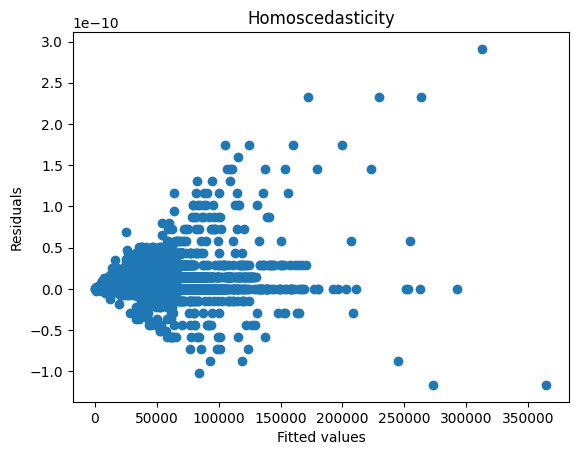

In [198]:

rainbow_p_value = linear_rainbow(results)[1]
linearity_satisfied = rainbow_p_value > 0.05
normal_p_value = normaltest(results.resid)[1]
normality_satisfied = normal_p_value > 0.05
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
multicollinearity_satisfied = all(vif["VIF"] < 5)

print(f"The model satisfies linearity: {linearity_satisfied}")
print(f"The model satisfies normality: {normality_satisfied}")
print(f"Independent variables are not much corelated: {multicollinearity_satisfied}")

# The variance of the residuals should be consistent across all levels of the independent variables
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity')
plt.show()


In [235]:
better_X = X.copy()
better_X = better_X.drop(columns=['age', 'duration_total', 'base'])
better_X = better_X.drop(columns=qualitative_columns)
model = sm.OLS(Y, sm.add_constant(better_X))
results = model.fit()
print(f"X.cols: {better_X.columns}")
    
vif

X.cols: Index(['bonus', 'overtime_pay', 'other', 'duration_entity', 'duration_nominal',
       'duration_overtime'],
      dtype='object')


Variable       VIF
0              bonus  1.255008
1       overtime_pay  4.342769
2              other  1.462024
3    duration_entity  2.470449
4   duration_nominal  2.734535
5  duration_overtime  4.613909